# Exercise Set 7

Due: **9:30 23 May 2022**

Discussion: **13:00 27 May 2022**

**Online submission** at via [ILIAS](https://www.ilias.uni-koeln.de/ilias/goto_uk_exc_4593683.html) in the directory Exercises / Übungen -> Submission of Exercises / Rückgabe des Übungsblätter

In [130]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sb

# 1. Kendall's tau coefficient [40 Points]

In statistics, the Kendall rank correlation coefficient, commonly referred to as Kendall’s tau coefficient (after the Greek letter $\tau$), is a statistic used to measure the ordinal association between two measured quantities. A tau test is a non-parametric hypothesis test for statistical dependence based on the tau coefficient. Spearman’s rank correlation is satisfactory for testing a null hypothesis of independence between two variables but it is difficult to interpret when the null hypothesis is rejected. Kendall’s rank correlation improves upon this by reflecting the strength of the dependence between the variables being compared.

Consider two samples, $x$ and $y$, each of size $n$. The total number of possible pairings of $x$ with $y$ observations is $\frac{n(n-1)}{2}$. Now consider pairs of ordered observations $(x_i, y_i)$ and $(x_j, y_j)$ with $i=1,\ldots n-1$ and $j=i+1,\ldots, n$. Then $x_1 \leq x_2 \leq \ldots \leq x_n$. Now pair $1$ is compared with every other pair $(2,3,,,n)$, Pair $2$ with all following pairs $(3,4,,,n)$ and so on. In total $\frac{n(n-1)}{2}$ pairs are compared. If for a pair:

- $x_i<x_j$ and $y_i<y_j$, it is concordant
- $x_i<x_j$ and $y_i>y_j$, it is disconcordant
- $x_i \ne x_j$ and $y_i=y_j$, it has a binding in $Y$
- $x_i = x_j$ and $y_i\ne y_j$, it has a binding in $X$
- $x_i = x_j$ and $y_i=y_j$, it has a binding in $X$ and $Y$

\newpage

The number of pairs that are:

- concordant are $C$
- disconcordant are $D$
- having a binding in $Y$ are $T_Y$
- having a binding in $X$ are $T_X$
- having a binding in $X$ and $Y$ are $T_{XY}$

Kendall's tau value compares the number of concordant and disconcordant pairs:

$\tau = \dfrac{C-D}{\sqrt{(C+D+T_X)(C+D+T_Y)}}$

The denominator is the total number of pair combinations, so the coefficient must be in the range $-1 \leq \tau \leq 1$. If the agreement between the two rankings is perfect (when the two rankings are the same) the coefficient has value $1$. If the disagreement between the two rankings is perfect (when one ranking is the reverse of the other) the coefficient has value $-1$.

Use the data file `hubble.dat`, which includes dataset $x$ in the first column and dataset $y$ in the second column.

**a.** Take the data and reorder it such that $x_1 \leq x_2 \leq \ldots \leq x_n$. **10 Points**

In [131]:
df = pd.read_csv("hubble.dat", delimiter="\s+", names=["A", "B"])
# sort "A" into ascending order
a = np.sort(df["A"].to_numpy())
b = df["B"].to_numpy()

**b.** Compute the number of concordant pairs $C$, disconcordant pairs $D$, bound pairs $T_X$, $T_Y$, and $T_{XY}$. **10 Points**

In [132]:
# Function that takes a and b as an argument and returns C,D,T_y,T_x and T_xy.
def count_pairs(a, b):
    # numbers of each pair type to be incremented
    c = 0
    d = 0
    ty = 0
    tx = 0
    txy = 0
    # loop over all pairs
    for i in range(len(a) - 2):
        pair1 = [a[i], b[i]]  # set the first pair
        # print("i",i)
        j = i + 1
        # loop over all pairs greater than first pair
        while j < len(a):
            # print("j",j)
            pair2 = [a[j], b[j]]  # set the second pair
            # Check conditions for concordance/binding and increment counters
            if pair1[0] < pair2[0] and pair1[1] < pair2[1]:
                c += 1
            elif pair1[0] < pair2[0] and pair1[1] > pair2[1]:
                d += 1
            elif pair1[0] != pair2[0] and pair1[1] == pair2[1]:
                ty += 1
            elif pair1[0] == pair2[0] and pair1[1] != pair2[1]:
                tx += 1
            elif pair1[0] == pair2[0] and pair1[1] == pair2[1]:
                txy += 1
            else:
                print("oops")
            j = j + 1
    return c, d, ty, tx, txy

In [133]:
print("c, d, ty, tx, txy", count_pairs(a, b))

c, d, ty, tx, txy (226, 44, 1, 4, 0)


**c.** Compute $\tau$. **10 Points**

In [134]:
# Function to compute Kendall's tau value given arrays a and b
def kendall_tau(a, b):
    # calculate c, d, ty, tx, txy for a and b
    c, d, ty, tx, txy = count_pairs(a, b)
    # compute numerator
    numer = c - d
    # compute denominator
    denom = np.sqrt((c + d + tx) * (c + d + ty))
    # compute tau
    tau = numer / denom
    return tau


# I have just realised there is also scipy.stats.kendalltau ......

In [135]:
print("tau=", kendall_tau(a, b))
tau = kendall_tau(a, b)

tau= 0.6679000271791601


**d.** How should the derived $\tau$ be interpreted (what does it tell about the two datasets)? Plot the dataset $x$ vs. $y$ and compare it with $\tau$ **10 Points**

Text(0, 0.5, 'y')

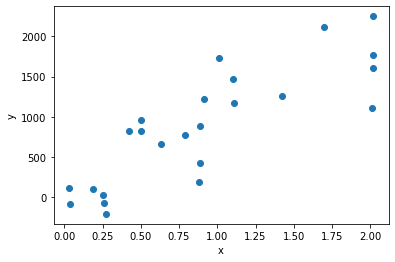

In [136]:
plt.figure()
plt.scatter(a, b)
plt.xlabel("x")
plt.ylabel("y")

The $\tau$ value tells us about the correlation between x and y.

# 2. Permutation tests [40 Points]

This exercise uses the data file `4point2.dat`. The data in the file are 20 uncorrelated $(x,y)$ pairs, followed by 20 correlated pairs.

In [141]:
# read in and sort data
df2 = pd.read_csv("4point2.dat", delimiter="\s+", names=["x", "y"])
# uncorrelated
df2_uncorr = df2.iloc[0:19]
x_uncorr = df2_uncorr["x"].to_numpy()
y_uncorr = df2_uncorr["y"].to_numpy()
# correlated
df2_corr = df2.iloc[20:39]
x_corr = df2_corr["x"].to_numpy()
y_corr = df2_corr["y"].to_numpy()
print(x_uncorr, y_uncorr)

TypeError: cannot convert the series to <class 'float'>

**a.** Take the uncorrelated pairs $(x,y)$ and compute the values for the Kendall and Spearman rank correlation coefficients and the Peason/Fischer r correlation coefficient. Why are they different? **20 Points**
 
 > (This is a good example why we should not blindly rely on the Peason's correlation coefficient)

In [138]:
# values for uncorrelated
uncorr_tau = st.kendalltau(x_uncorr, y_uncorr)
uncorr_spearman = st.spearmanr(x_uncorr, y_uncorr)
uncorr_pearson = st.pearsonr(x_uncorr, y_uncorr)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

**b.** By permutation methods we want to derive distributions of Fisher $r$, Spearman’s and Kendall’s statistics. To do this, first we take the uncorrelated data set and randomly assign $x$-values to $y$-values to make new pairs. This should give the range of values of the test statistic which are consistent with there being no correlation. There are $20!$ distinct permutations for even this little dataset. Compute your results for 1000 of these at random. (This is achieved by sampling without replacement from the set of 20 $X$'s and assigning each one in order to the set of $Y$'s) For each of the 1000 random samples compute their Fisher $r$ value, Spearman’s and Kendall’s statistics and plot their cumulative distributions. Explain what the obtained plots tell. **20 Points**

**c.** Now take the correlated set of data and do the same as **b)**. Interprete the results with comparing the plots of uncorrelated datasets. **20 Points**